In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df_train_labels_original = pd.read_csv('train_labels.csv',low_memory=False)
df_train_values_original = pd.read_csv('train_values.csv',low_memory=False, dtype= {
'geo_level_1_id':'uint8', 'geo_level_2_id':'uint16', 'geo_level_3_id':'uint16', 'count_floors_pre_eq':'uint8','age':'uint16', 'area_percentage':'uint16', 'height_percentage':'uint16', 
'land_surface_condition':'category', 'foundation_type':'category', 'roof_type':'category', 'ground_floor_type':'category', 'other_floor_type':'category', 'position':'category','plan_configuration':'category', 
'has_superstructure_adobe_mud':'bool', 'has_superstructure_mud_mortar_stone':'bool','has_superstructure_stone_flag':'bool', 'has_superstructure_cement_mortar_stone':'bool', 'has_superstructure_mud_mortar_brick':'bool', 'has_superstructure_cement_mortar_brick':'bool', 'has_superstructure_timber':'bool', 'has_superstructure_bamboo':'bool', 'has_superstructure_rc_non_engineered':'bool', 'has_superstructure_rc_engineered':'bool', 'has_superstructure_other':'bool', 
'legal_ownership_status':'category', 'count_families':'uint16', 
'has_secondary_use':'bool', 'has_secondary_use_agriculture':'bool', 'has_secondary_use_hotel':'bool', 'has_secondary_use_rental':'bool', 'has_secondary_use_institution':'bool', 'has_secondary_use_school':'bool', 'has_secondary_use_industry':'bool', 'has_secondary_use_health_post':'bool', 'has_secondary_use_gov_office':'bool', 'has_secondary_use_use_police':'bool', 'has_secondary_use_other':'bool',})

In [48]:
df_train_labels_original.head(10)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


In [49]:
df_train_labels_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [50]:
df_train_values_original.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False
5,333020,8,558,6089,2,10,9,5,t,r,...,True,False,False,False,False,False,False,False,False,False
6,728451,9,475,12066,2,25,3,4,n,r,...,False,False,False,False,False,False,False,False,False,False
7,475515,20,323,12236,2,0,8,6,t,w,...,False,False,False,False,False,False,False,False,False,False
8,441126,0,757,7219,2,15,8,6,t,r,...,False,False,False,False,False,False,False,False,False,False
9,989500,26,886,994,1,0,13,4,t,i,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df_train_values_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  uint8   
 2   geo_level_2_id                          260601 non-null  uint16  
 3   geo_level_3_id                          260601 non-null  uint16  
 4   count_floors_pre_eq                     260601 non-null  uint8   
 5   age                                     260601 non-null  uint16  
 6   area_percentage                         260601 non-null  uint16  
 7   height_percentage                       260601 non-null  uint16  
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [52]:
df_train_values_original['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [53]:
df_train_values_original['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [54]:
df_train_values_original['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

In [55]:
df_train_values_original['ground_floor_type'].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

In [56]:
df_train_values_original['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [57]:
df_train_values_original['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

In [58]:
df_train_values_original['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [59]:
df_train_values_original['legal_ownership_status'].value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

------

In [60]:
df_train_values_original['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

In [61]:
df_train_values_original[['count_floors_pre_eq','building_id']].head(10)

,count_floors_pre_eq,building_id
0,2,802906
1,2,28830
2,2,94947
3,2,590882
4,3,201944
5,2,333020
6,2,728451
7,2,475515
8,2,441126
9,1,989500


In [62]:
df_train_labels_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


# Cantidad de edificios dañados segun tipo de daño y cantidad de pisos (excluidos los de 6+ pisos porque no representan el 1%)

In [63]:
edificios_x_piso_y_damage = df_train_values_original[df_train_values_original['count_floors_pre_eq'] < 6].merge(df_train_labels_original, on='building_id')[['building_id', 'count_floors_pre_eq', 'damage_grade']].groupby(['count_floors_pre_eq', 'damage_grade']).agg({'building_id': 'count'}).reset_index()
edificios_x_piso_y_damage.columns = ["Pisos", "Daño", "Cantidad"]
edificios_x_piso_y_damage

,Pisos,Daño,Cantidad
0,1,1,8969
1,1,2,20798
2,1,3,10674
3,2,1,12593
4,2,2,93968
5,2,3,50062
6,3,1,2537
7,3,2,28479
8,3,3,24601
9,4,1,707


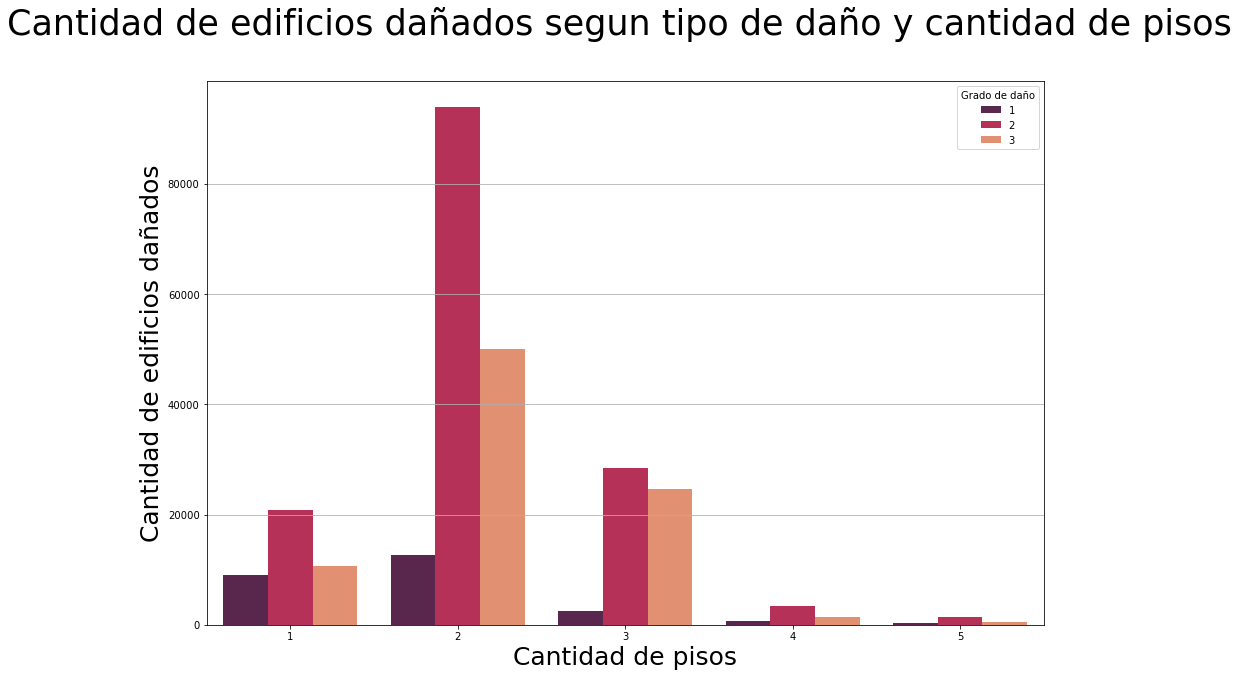

In [64]:
fig,ax=plt.subplots(figsize=(15,10))

plt.grid(True)
g = sns.barplot(ax=ax,data=edificios_x_piso_y_damage,x='Pisos',y='Cantidad',palette='rocket',alpha=1,hue='Daño')
g.set_title('Cantidad de edificios dañados segun tipo de daño y cantidad de pisos \n',size=35)
g.set_xlabel('Cantidad de pisos',size=25)
g.set_ylabel('Cantidad de edificios dañados',size=25)
g.legend(title='Grado de daño')

# Analisis sobre datos de area_percentage y height_percentage

In [65]:
df_merged_area_height = df_train_values_original[['building_id', 'area_percentage', 'height_percentage']].merge(df_train_labels_original, on='building_id')
df_merged_area_height.head(10)

,building_id,area_percentage,height_percentage,damage_grade
0,802906,6,5,3
1,28830,8,7,2
2,94947,5,5,3
3,590882,6,5,2
4,201944,8,9,3
5,333020,9,5,2
6,728451,3,4,3
7,475515,8,6,1
8,441126,8,6,2
9,989500,13,4,1


In [66]:
df_merged_area_height['area_ratio'] = df_merged_area_height['area_percentage'] / df_merged_area_height['height_percentage']
df_damage_percentage_by_area_ratio = df_merged_area_height[['area_ratio', 'damage_grade' ]].groupby(['area_ratio']).agg({'damage_grade': 'mean'}).reset_index()

## Relacion entre la superficie ocupada y el grado de daño recibido

In [67]:
df_damage_percentage_by_area_percentage = df_merged_area_height[['area_percentage', 'damage_grade']].groupby(['area_percentage']).agg({'damage_grade': ['mean','count']}).reset_index()
df_damage_percentage_by_area_percentage.columns = ["area_percentage", "damage_percentage", "count"]
df_damage_percentage_by_area_percentage_filtered = df_damage_percentage_by_area_percentage[df_damage_percentage_by_area_percentage['count'] > (df_damage_percentage_by_area_percentage['count'].max()*0.1)]
df_damage_percentage_by_area_percentage_filtered

,area_percentage,damage_percentage,count
2,3,2.280139,11837
3,4,2.261281,19236
4,5,2.306503,32724
5,6,2.297908,42013
6,7,2.278325,36752
7,8,2.261452,28445
8,9,2.234695,22199
9,10,2.209889,15613
10,11,2.184655,13907
11,12,2.145627,7581


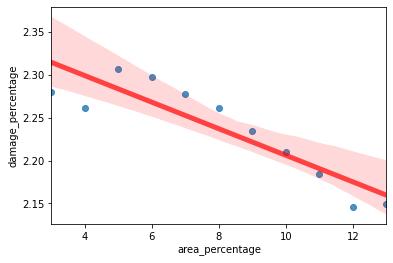

In [68]:
# plot
sns.regplot(x=df_damage_percentage_by_area_percentage_filtered["area_percentage"], y=df_damage_percentage_by_area_percentage_filtered["damage_percentage"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

## Relacion entre la altura de la edificacion y el grado de daño recibido

In [69]:
df_damage_percentage_by_height_percentage = df_merged_area_height[['height_percentage', 'damage_grade']].groupby(['height_percentage']).agg({'damage_grade': ['mean','count']}).reset_index()
df_damage_percentage_by_height_percentage.columns = ["height_percentage", "damage_percentage", "count"]
df_damage_percentage_by_height_percentage_filtered = df_damage_percentage_by_height_percentage[df_damage_percentage_by_height_percentage['count'] > (df_damage_percentage_by_height_percentage['count'].max()*0.1)]
df_damage_percentage_by_height_percentage_filtered

,height_percentage,damage_percentage,count
0,2,2.156905,9305
1,3,2.002966,25957
2,4,2.221698,37763
3,5,2.270019,78513
4,6,2.303354,46477
5,7,2.319188,35465
6,8,2.336426,13902


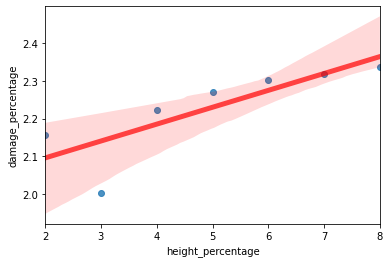

In [70]:
# plot
sns.regplot(x=df_damage_percentage_by_height_percentage_filtered["height_percentage"], y=df_damage_percentage_by_height_percentage_filtered["damage_percentage"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

## """""Relacion entre el ratio (superficie / altura) de la edificacion y el grado de daño recibido"""""

In [71]:
df_damage_percentage_by_area_height_ratio = df_merged_area_height[['area_ratio', 'damage_grade']].groupby(['area_ratio']).agg({'damage_grade': ['mean','count']}).reset_index()
df_damage_percentage_by_area_height_ratio.columns = ["area_ratio", "damage_percentage", "count"]
df_damage_percentage_by_area_height_ratio_filtered = df_damage_percentage_by_area_height_ratio[df_damage_percentage_by_area_height_ratio['count'] > (df_damage_percentage_by_area_height_ratio['count'].max()*0.1)]
df_damage_percentage_by_area_height_ratio_filtered

,area_ratio,damage_percentage,count
62,0.600000,2.340909,3520
70,0.666667,2.290468,3546
75,0.714286,2.434100,3566
81,0.750000,2.304695,4260
86,0.800000,2.297634,6256
89,0.833333,2.357550,5258
92,0.857143,2.400898,5570
107,1.000000,2.297034,33215
121,1.142857,2.316024,4487
124,1.166667,2.338642,7347


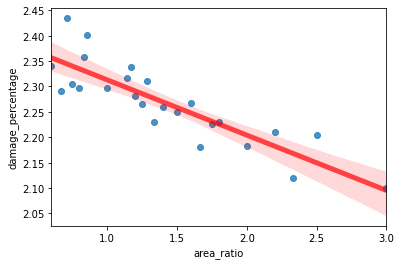

In [72]:
# plot
sns.regplot(x=df_damage_percentage_by_area_height_ratio_filtered["area_ratio"], y=df_damage_percentage_by_area_height_ratio_filtered["damage_percentage"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

In [73]:
df_merged_position = df_train_values_original[['building_id', 'position']].merge(df_train_labels_original, on='building_id')
df_merged_position.head(10)

,building_id,position,damage_grade
0,802906,t,3
1,28830,s,2
2,94947,t,3
3,590882,s,2
4,201944,s,3
5,333020,s,2
6,728451,s,3
7,475515,s,1
8,441126,s,2
9,989500,s,1


In [75]:
df_merged_position_damage = df_merged_position.groupby(['position','damage_grade']).agg({'building_id':['count']}).reset_index()
df_merged_position_damage.columns = ['position', 'damage_grade', 'building_count']
df_merged_position_damage

,position,damage_grade,building_count
0,j,1,1675
1,j,2,7899
2,j,3,3708
3,o,1,120
4,o,2,1609
5,o,3,604
6,s,1,19867
7,s,2,116051
8,s,3,66172
9,t,1,3462


In [76]:
df_merged_position_damage['total_building_by_pos'] = df_merged_position_damage[['position','building_count']].groupby(['position']).transform('sum')
df_merged_position_damage['proportion'] = df_merged_position_damage['building_count'] / df_merged_position_damage['total_building_by_pos']
df_merged_position_damage

,position,damage_grade,building_count,total_building_by_pos,proportion
0,j,1,1675,13282,0.126111
1,j,2,7899,13282,0.594715
2,j,3,3708,13282,0.279175
3,o,1,120,2333,0.051436
4,o,2,1609,2333,0.689670
5,o,3,604,2333,0.258894
6,s,1,19867,202090,0.098308
7,s,2,116051,202090,0.574254
8,s,3,66172,202090,0.327438
9,t,1,3462,42896,0.080707


In [110]:
damage_1 = df_merged_position_damage[df_merged_position_damage['damage_grade'] == 1]
damage_2 = df_merged_position_damage[df_merged_position_damage['damage_grade'] == 2]
damage_3 = df_merged_position_damage[df_merged_position_damage['damage_grade'] == 3]
damage_12 = df_merged_position_damage[df_merged_position_damage['damage_grade'] < 3][['position', 'proportion']].groupby(['position']).agg({'proportion':'sum'})

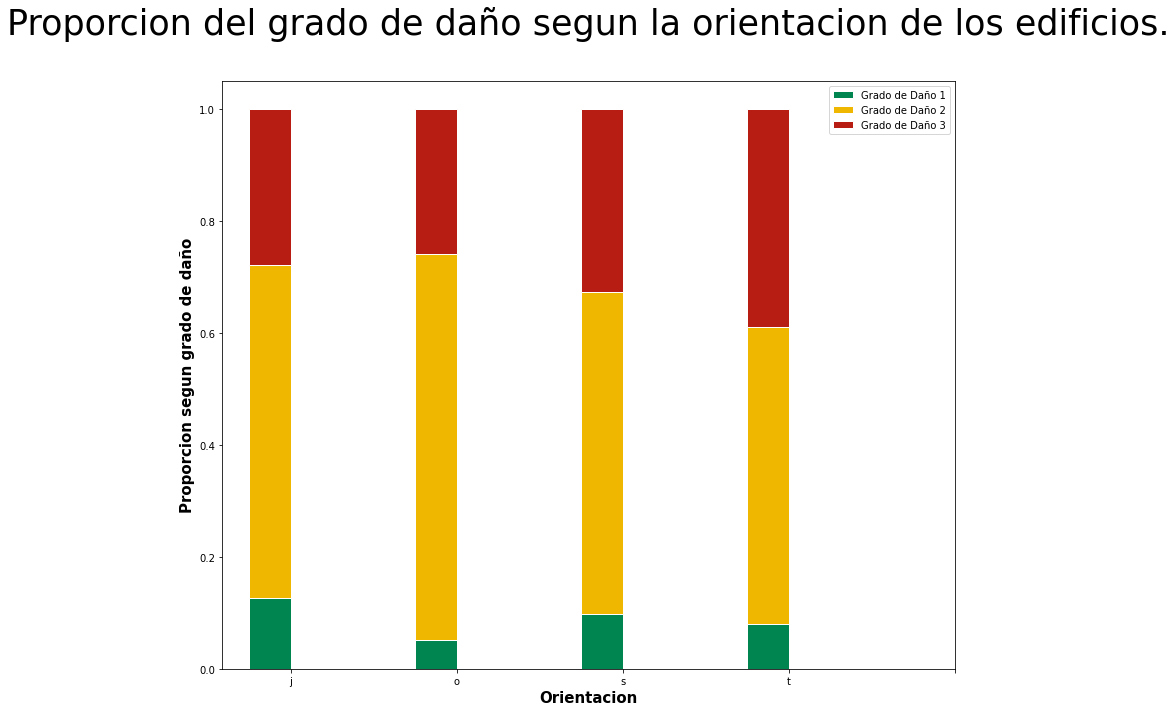

In [120]:
# Seteos grales del grafico
fig,ax=plt.subplots(figsize=(15,10))
barWidth = 0.25
 
# Seteo de lista de datos
g_damage_1 = damage_1['proportion']
g_damage_2 = damage_2['proportion']
g_damage_3 = damage_3['proportion']
g_damage_12  = damage_12['proportion']
 
# Seteo posiciones de barras
r1 = np.arange(len(damage_1))
r2 = [x + barWidth for x in r1]
 
# Genero Grafico
plt.bar(r1, g_damage_1, color='#008450', width=barWidth, edgecolor='white', label='Grado de Daño 1')
plt.bar(r1, g_damage_2, bottom=g_damage_1, color='#EFB700', width=barWidth, edgecolor='white', label='Grado de Daño 2')
plt.bar(r1, g_damage_3, bottom=g_damage_12, color='#B81D13', width=barWidth, edgecolor='white', label='Grado de Daño 3')
 
# Seteo descripcion de ejes
plt.xlabel('Orientacion', fontweight='bold',size=15)
plt.ylabel('Proporcion segun grado de daño', fontweight='bold',size=15)
plt.xticks([r + barWidth/2 for r in range(5)], df_merged_position_damage["position"].unique())
 
# Muestro grafico
plt.title('Proporcion del grado de daño segun la orientacion de los edificios.\n',size=35)
plt.legend()

plt.tight_layout()
####plt.savefig("pngs/region-aprob-stage.png")

####plt.tight_layout()
####plt.savefig("pngs/relacion-lost-won-por-region-segun-aprobacion-precio.png")

plt.show()

Comentario: La proporcion segun el grado de daño no varia para los edificios con distintas orientaciones. Era de esperarse que la orientacion no influya en la distribucion de daño.